In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
!kaggle datasets download -d rohitsahoo/sales-forecasting

Dataset URL: https://www.kaggle.com/datasets/rohitsahoo/sales-forecasting
License(s): GPL-2.0
  0% 0.00/480k [00:00<?, ?B/s]
100% 480k/480k [00:00<00:00, 89.3MB/s]


In [6]:
!unzip sales-forecasting.zip

Archive:  sales-forecasting.zip
  inflating: train.csv               


In [7]:
import pandas as pd

In [8]:
df=pd.read_csv('train.csv')

In [9]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [10]:
df1=df.drop(columns=['Row ID','Customer Name','Category','Sub-Category','Country'])

In [11]:
df1

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Product Name,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Corporate,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Anker 24W Portable Micro USB Car Charger,26.3760


In [12]:
df1=df1.drop(columns='Ship Date')

In [13]:
df1

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Product Name,Sales
0,CA-2017-152156,08/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,Second Class,DV-13045,Corporate,Los Angeles,California,90036.0,West,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,Standard Class,SH-19975,Corporate,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,OFF-AR-10001374,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10004977,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,Standard Class,CS-12490,Corporate,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Anker 24W Portable Micro USB Car Charger,26.3760


In [14]:
import matplotlib.pyplot as plt

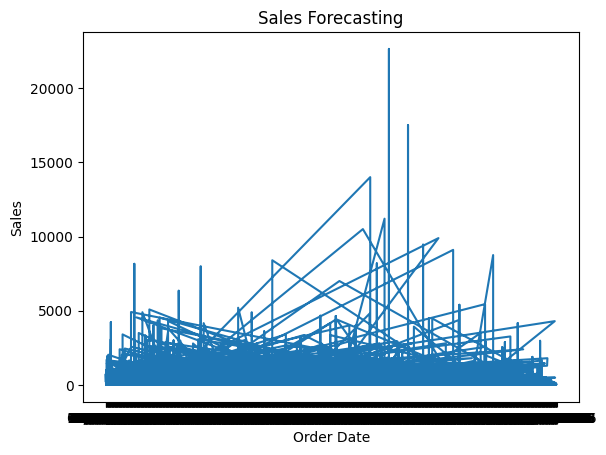

In [15]:

x=df1['Order Date']
y=df1['Sales']
plt.plot(x,y)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting')
plt.show()

In [16]:
df1 = df1.sort_values(by='Order Date',ascending=False)

In [17]:
df1

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Product Name,Sales
2821,CA-2017-100202,31/12/2017,Standard Class,BD-11620,Consumer,Anaheim,California,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376
4612,US-2017-165953,31/12/2017,Standard Class,EP-13915,Consumer,Jacksonville,Florida,32216.0,South,OFF-AR-10000588,Newell 345,47.616
1152,CA-2017-160395,31/12/2017,Standard Class,KL-16555,Corporate,Reno,Nevada,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640
1153,CA-2017-160395,31/12/2017,Standard Class,KL-16555,Corporate,Reno,Nevada,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768
5738,CA-2017-156139,31/12/2017,Standard Class,BP-11155,Consumer,San Francisco,California,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376
...,...,...,...,...,...,...,...,...,...,...,...,...
8074,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748
8073,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470
8075,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224
848,CA-2018-107503,01/01/2018,Standard Class,GA-14725,Consumer,Lorain,Ohio,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896


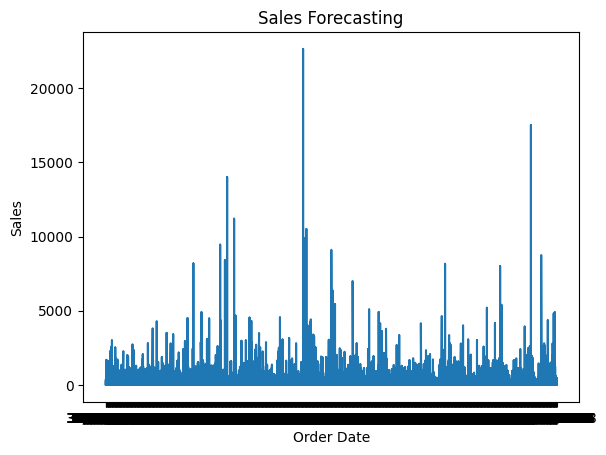

In [18]:

x=df1['Order Date']
y=df1['Sales']
plt.plot(x,y)
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Forecasting')
plt.show()

In [20]:
!pip install seaborn xgboost lightgbm pmdarima statsmodels



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00


In [21]:
df1.dropna(axis=0,inplace=True)

In [22]:
df1

,Order ID,Order Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,Product ID,Product Name,Sales
2821,CA-2017-100202,31/12/2017,Standard Class,BD-11620,Consumer,Anaheim,California,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376
4612,US-2017-165953,31/12/2017,Standard Class,EP-13915,Consumer,Jacksonville,Florida,32216.0,South,OFF-AR-10000588,Newell 345,47.616
1152,CA-2017-160395,31/12/2017,Standard Class,KL-16555,Corporate,Reno,Nevada,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640
1153,CA-2017-160395,31/12/2017,Standard Class,KL-16555,Corporate,Reno,Nevada,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768
5738,CA-2017-156139,31/12/2017,Standard Class,BP-11155,Consumer,San Francisco,California,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376
...,...,...,...,...,...,...,...,...,...,...,...,...
8074,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748
8073,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470
8075,CA-2018-151750,01/01/2018,Standard Class,JM-15250,Consumer,Huntsville,Texas,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224
848,CA-2018-107503,01/01/2018,Standard Class,GA-14725,Consumer,Lorain,Ohio,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896


In [23]:
df1.drop(columns=['Order ID'],inplace=True)

In [24]:
df1.drop(columns=['State','Customer ID'],inplace=True)

In [25]:
df1

,Order Date,Ship Mode,Segment,City,Postal Code,Region,Product ID,Product Name,Sales
2821,31/12/2017,Standard Class,Consumer,Anaheim,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376
4612,31/12/2017,Standard Class,Consumer,Jacksonville,32216.0,South,OFF-AR-10000588,Newell 345,47.616
1152,31/12/2017,Standard Class,Corporate,Reno,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640
1153,31/12/2017,Standard Class,Corporate,Reno,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768
5738,31/12/2017,Standard Class,Consumer,San Francisco,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376
...,...,...,...,...,...,...,...,...,...
8074,01/01/2018,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748
8073,01/01/2018,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470
8075,01/01/2018,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224
848,01/01/2018,Standard Class,Consumer,Lorain,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896


In [26]:
df1['Order Date']=pd.to_datetime(df1['Order Date'])

<ipython-input-26-63b323dcfb47>:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Order Date']=pd.to_datetime(df1['Order Date'])


In [27]:
df1


,Order Date,Ship Mode,Segment,City,Postal Code,Region,Product ID,Product Name,Sales
2821,2017-12-31,Standard Class,Consumer,Anaheim,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376
4612,2017-12-31,Standard Class,Consumer,Jacksonville,32216.0,South,OFF-AR-10000588,Newell 345,47.616
1152,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640
1153,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768
5738,2017-12-31,Standard Class,Consumer,San Francisco,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376
...,...,...,...,...,...,...,...,...,...
8074,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748
8073,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470
8075,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224
848,2018-01-01,Standard Class,Consumer,Lorain,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896


In [28]:
df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [32]:
df1['Ship Date']=pd.to_datetime(df['Ship Date'])

ValueError: time data "16/06/2017" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [31]:
df.dropna(axis=0,inplace=True)

In [35]:
df1['Ship Date']=pd.to_datetime(df['Ship Date'],format='%d/%m/%Y')

In [36]:
df1


,Order Date,Ship Mode,Segment,City,Postal Code,Region,Product ID,Product Name,Sales,Ship Date
2821,2017-12-31,Standard Class,Consumer,Anaheim,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376,2018-01-05
4612,2017-12-31,Standard Class,Consumer,Jacksonville,32216.0,South,OFF-AR-10000588,Newell 345,47.616,2018-01-06
1152,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640,2018-01-06
1153,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768,2018-01-06
5738,2017-12-31,Standard Class,Consumer,San Francisco,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,2018-01-06
...,...,...,...,...,...,...,...,...,...,...
8074,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,2018-01-05
8073,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470,2018-01-05
8075,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2018-01-05
848,2018-01-01,Standard Class,Consumer,Lorain,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896,2018-01-06


In [37]:
df1['Date_Difference']=(df1['Ship Date']-df1['Order Date']).dt.days

In [38]:
df1


,Order Date,Ship Mode,Segment,City,Postal Code,Region,Product ID,Product Name,Sales,Ship Date,Date_Difference
2821,2017-12-31,Standard Class,Consumer,Anaheim,92804.0,West,TEC-PH-10002563,Adtran 1202752G1,302.376,2018-01-05,5
4612,2017-12-31,Standard Class,Consumer,Jacksonville,32216.0,South,OFF-AR-10000588,Newell 345,47.616,2018-01-06,6
1152,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-AR-10003759,"Crayola Anti Dust Chalk, 12/Pack",3.640,2018-01-06,6
1153,2017-12-31,Standard Class,Corporate,Reno,89502.0,West,OFF-BI-10003984,Lock-Up Easel 'Spel-Binder',159.768,2018-01-06,6
5738,2017-12-31,Standard Class,Consumer,San Francisco,94109.0,West,OFF-BI-10004233,"GBC Pre-Punched Binding Paper, Plastic, White,...",38.376,2018-01-06,6
...,...,...,...,...,...,...,...,...,...,...,...
8074,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000343,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",13.748,2018-01-05,4
8073,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-BI-10000301,GBC Instant Report Kit,6.470,2018-01-05,4
8075,2018-01-01,Standard Class,Consumer,Huntsville,77340.0,Central,OFF-AP-10004708,Fellowes Superior 10 Outlet Split Surge Protector,15.224,2018-01-05,4
848,2018-01-01,Standard Class,Consumer,Lorain,44052.0,East,FUR-FU-10003878,"Linden 10"" Round Wall Clock, Black",48.896,2018-01-06,5


In [39]:
!pip install prophet

In [43]:
# Convert 'Order Date' and 'Ship Date' columns to datetime objects if they aren't already
from prophet import Prophet
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

monthly_data = df1.resample('M', on='Order Date')['Sales'].sum().reset_index() # Resample only the 'Sales' column
monthly_data = monthly_data.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

data_train = monthly_data.iloc[:-12]
data_test = monthly_data.iloc[-12:]
model = Prophet(
    seasonality_mode = 'additive',
    seasonality_prior_scale = 10,
    yearly_seasonality=True)
model.fit(data_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ba91vne/qs9few5d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7ba91vne/ax51stwl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22633', 'data', 'file=/tmp/tmp7ba91vne/qs9few5d.json', 'init=/tmp/tmp7ba91vne/ax51stwl.json', 'output', 'file=/tmp/tmp7ba91vne/prophet_modelyb8hbt97/prophet_model-20240708121141.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:11:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:11:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [47]:
fitted_y = model.predict(data_train)
y_predict = model.predict(data_test)

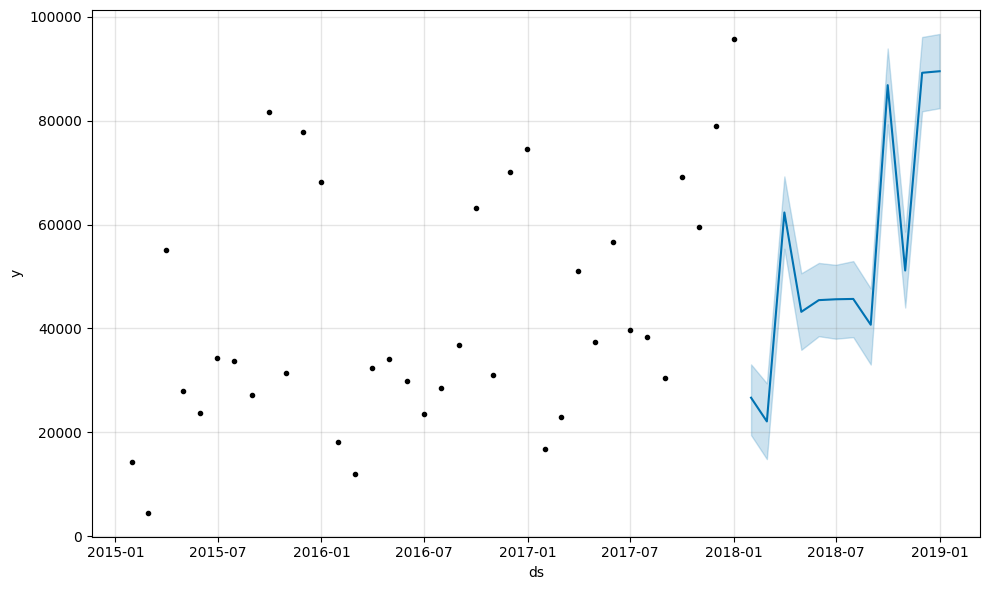

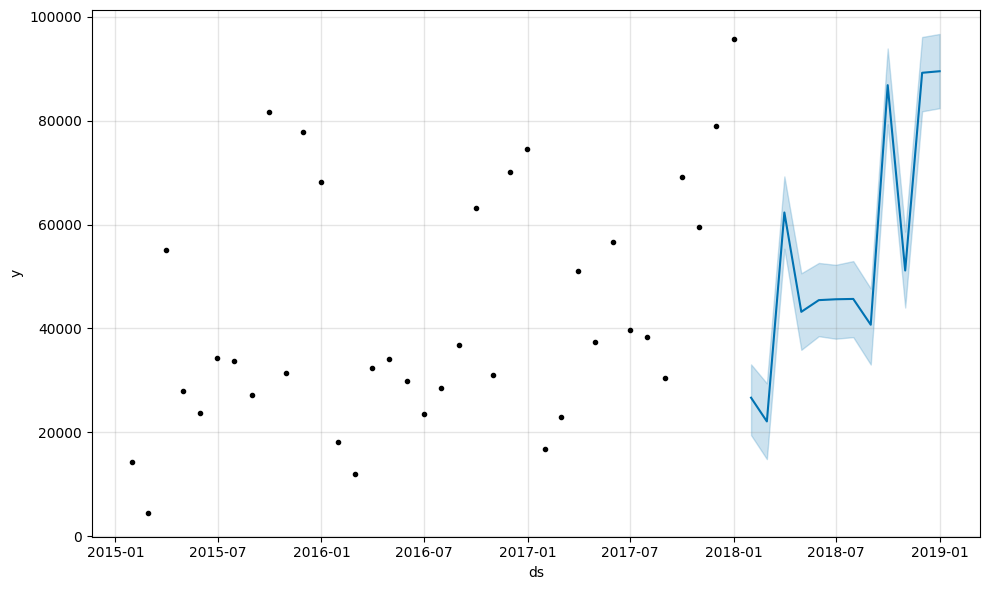

In [48]:
model.plot(y_predict)